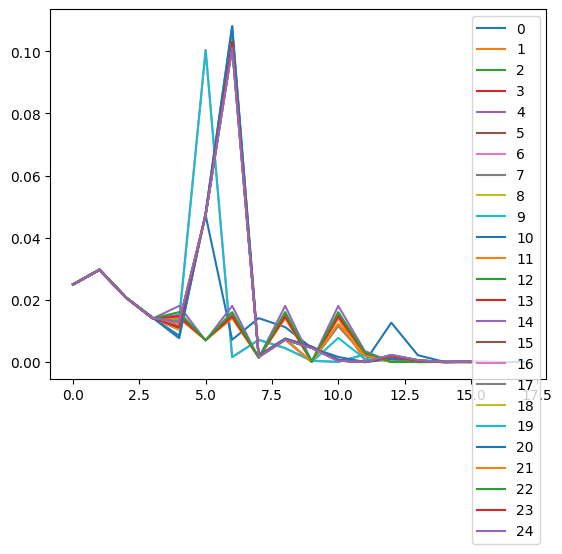

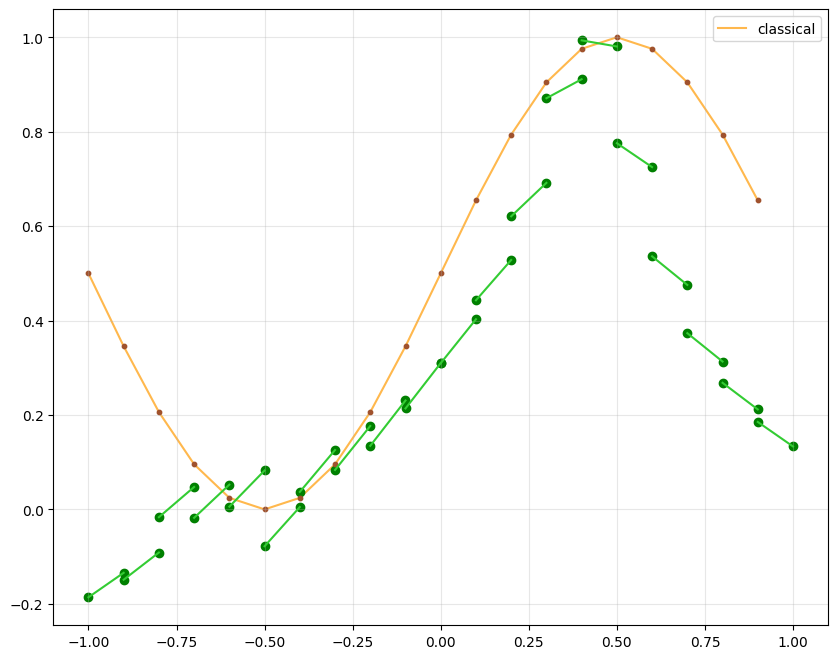

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from vqls import *
from utils import *
import matplotlib.lines as mlines


nq = 1
n_step = 20
step = (1-(-1))/n_step

label = 'sin'
func_out = {'sigmoid': sigmoid,'tanh': tanh,'elu': elu, 'relu': relu, 'sin':sin_m}
func_list = list(func_out.keys())
func_dict = {'sigmoid': .0,'tanh': 1.0,'elu':.12, 'relu':.0, 'sin':1}
columns=['function', 'nq', 'knot', 'training cost', 'time(s)', 'weights', 'RSS_h', 'RSS_q' ]

file_path = f'results_vqs_{label}_1_{n_step}.json'

lower = -1. 
upper = 1. 
f_i = func_dict[label]
scaled=False
func = func_out[label]


df = pd.read_json(file_path)

#Visualize training cost and obtain best performing epoch
argM = []
for i,item in enumerate(df["training_cost"].values):
    argM.append(np.argmin(item))
    plt.plot(item, label = i)
plt.legend()
plt.show()
best = np.argmin(df['rmse'])
weights = df['weights'][best]


X = []
weights = df['weights'][best]
x = np.arange(-1, 1 + .03, step).tolist()
from utils import *
y = [func(value,f_i) for value in x]

for i in range(1, len(x)):
    X.append(np.arange(x[i - 1], x[i], step - 0.0001).tolist())



#################################
######### Inner Product #########
#################################

qc_full = []
classic_prod = []
qprod = qProduct(1)
for i in range(len(X)):
    for x in X[i]:
        point = [1,x]
        qc_full.append(qprod.direct_prod2(weights[i],point,visualize=False))  

x = [item for sublist in X for item in sublist]
y = [func(value,f_i) for value in x]




x1=[i for j,i in enumerate(x) if j%2==0]
y1=[i for j,i in enumerate(y) if j%2==0]
x2 = np.array([i for i in x]).reshape([20,2])
yeee = np.array([i.item() for i in qc_full]).reshape([20,2])


fig, ax = plt.subplots(figsize=(10, 8))
#ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
#ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
for xk, yk in zip(x2, yeee):
    ax.plot(xk, yk, color='#33cc33') 
    ax.scatter(xk, yk, color='#008000') 

ax.plot(x1,y1,color='#ffb84d', zorder = -1, label='classical')
ax.scatter(x1,y1,color='sienna',s=10)
ax.grid(alpha=0.3)
plt.legend(loc='best')
plt.show()
plt.close()


In [2]:
df.head()

,exe_time,rmse,RSS_q,weights,training_cost,seed
0,132.324454,0.296267,3.510967,"[[0.3764561929], [0.4318964789], [0.4807974528...","[0.025021775000000003, 0.0297892158, 0.0208014...",8663
1,130.119987,0.296154,3.508293,"[[0.39635195440000004], [0.4311976024], [0.458...","[0.0249774725, 0.029724598100000003, 0.0207505...",7508
2,130.960278,0.294012,3.457725,"[[0.3758851657], [0.4259779628], [0.4764579698...","[0.024959014, 0.0296977928, 0.020729212, 0.014...",1034
3,129.017597,0.295939,3.503200,"[[0.3936238956], [0.4026070819], [0.4590410427...","[0.024987989500000002, 0.0297399016, 0.0207626...",8652
4,127.972796,0.289851,3.360544,"[[0.37446164200000004], [0.4041362847], [0.254...","[0.024924372, 0.029647671400000002, 0.02068910...",3704


In [3]:
columns=['function', 'training cost', 'time(s)', 'weights', 'RSS_q', 'rmse']
tot = []
for flab, fun in func_out.items():
    file_path = f'results_vqs_{flab}_1_{n_step}.json'
    df = pd.read_json(file_path)
    best = np.argmin(df['RSS_q'])
    weights = df['weights'][best]
    tot.append([flab, df.training_cost[best], df.exe_time[best], df['weights'][best], df.RSS_q[best], df.rmse ])

df = pd.DataFrame(tot, columns=columns)


0 0
0 1
1 0
1 1
2 0


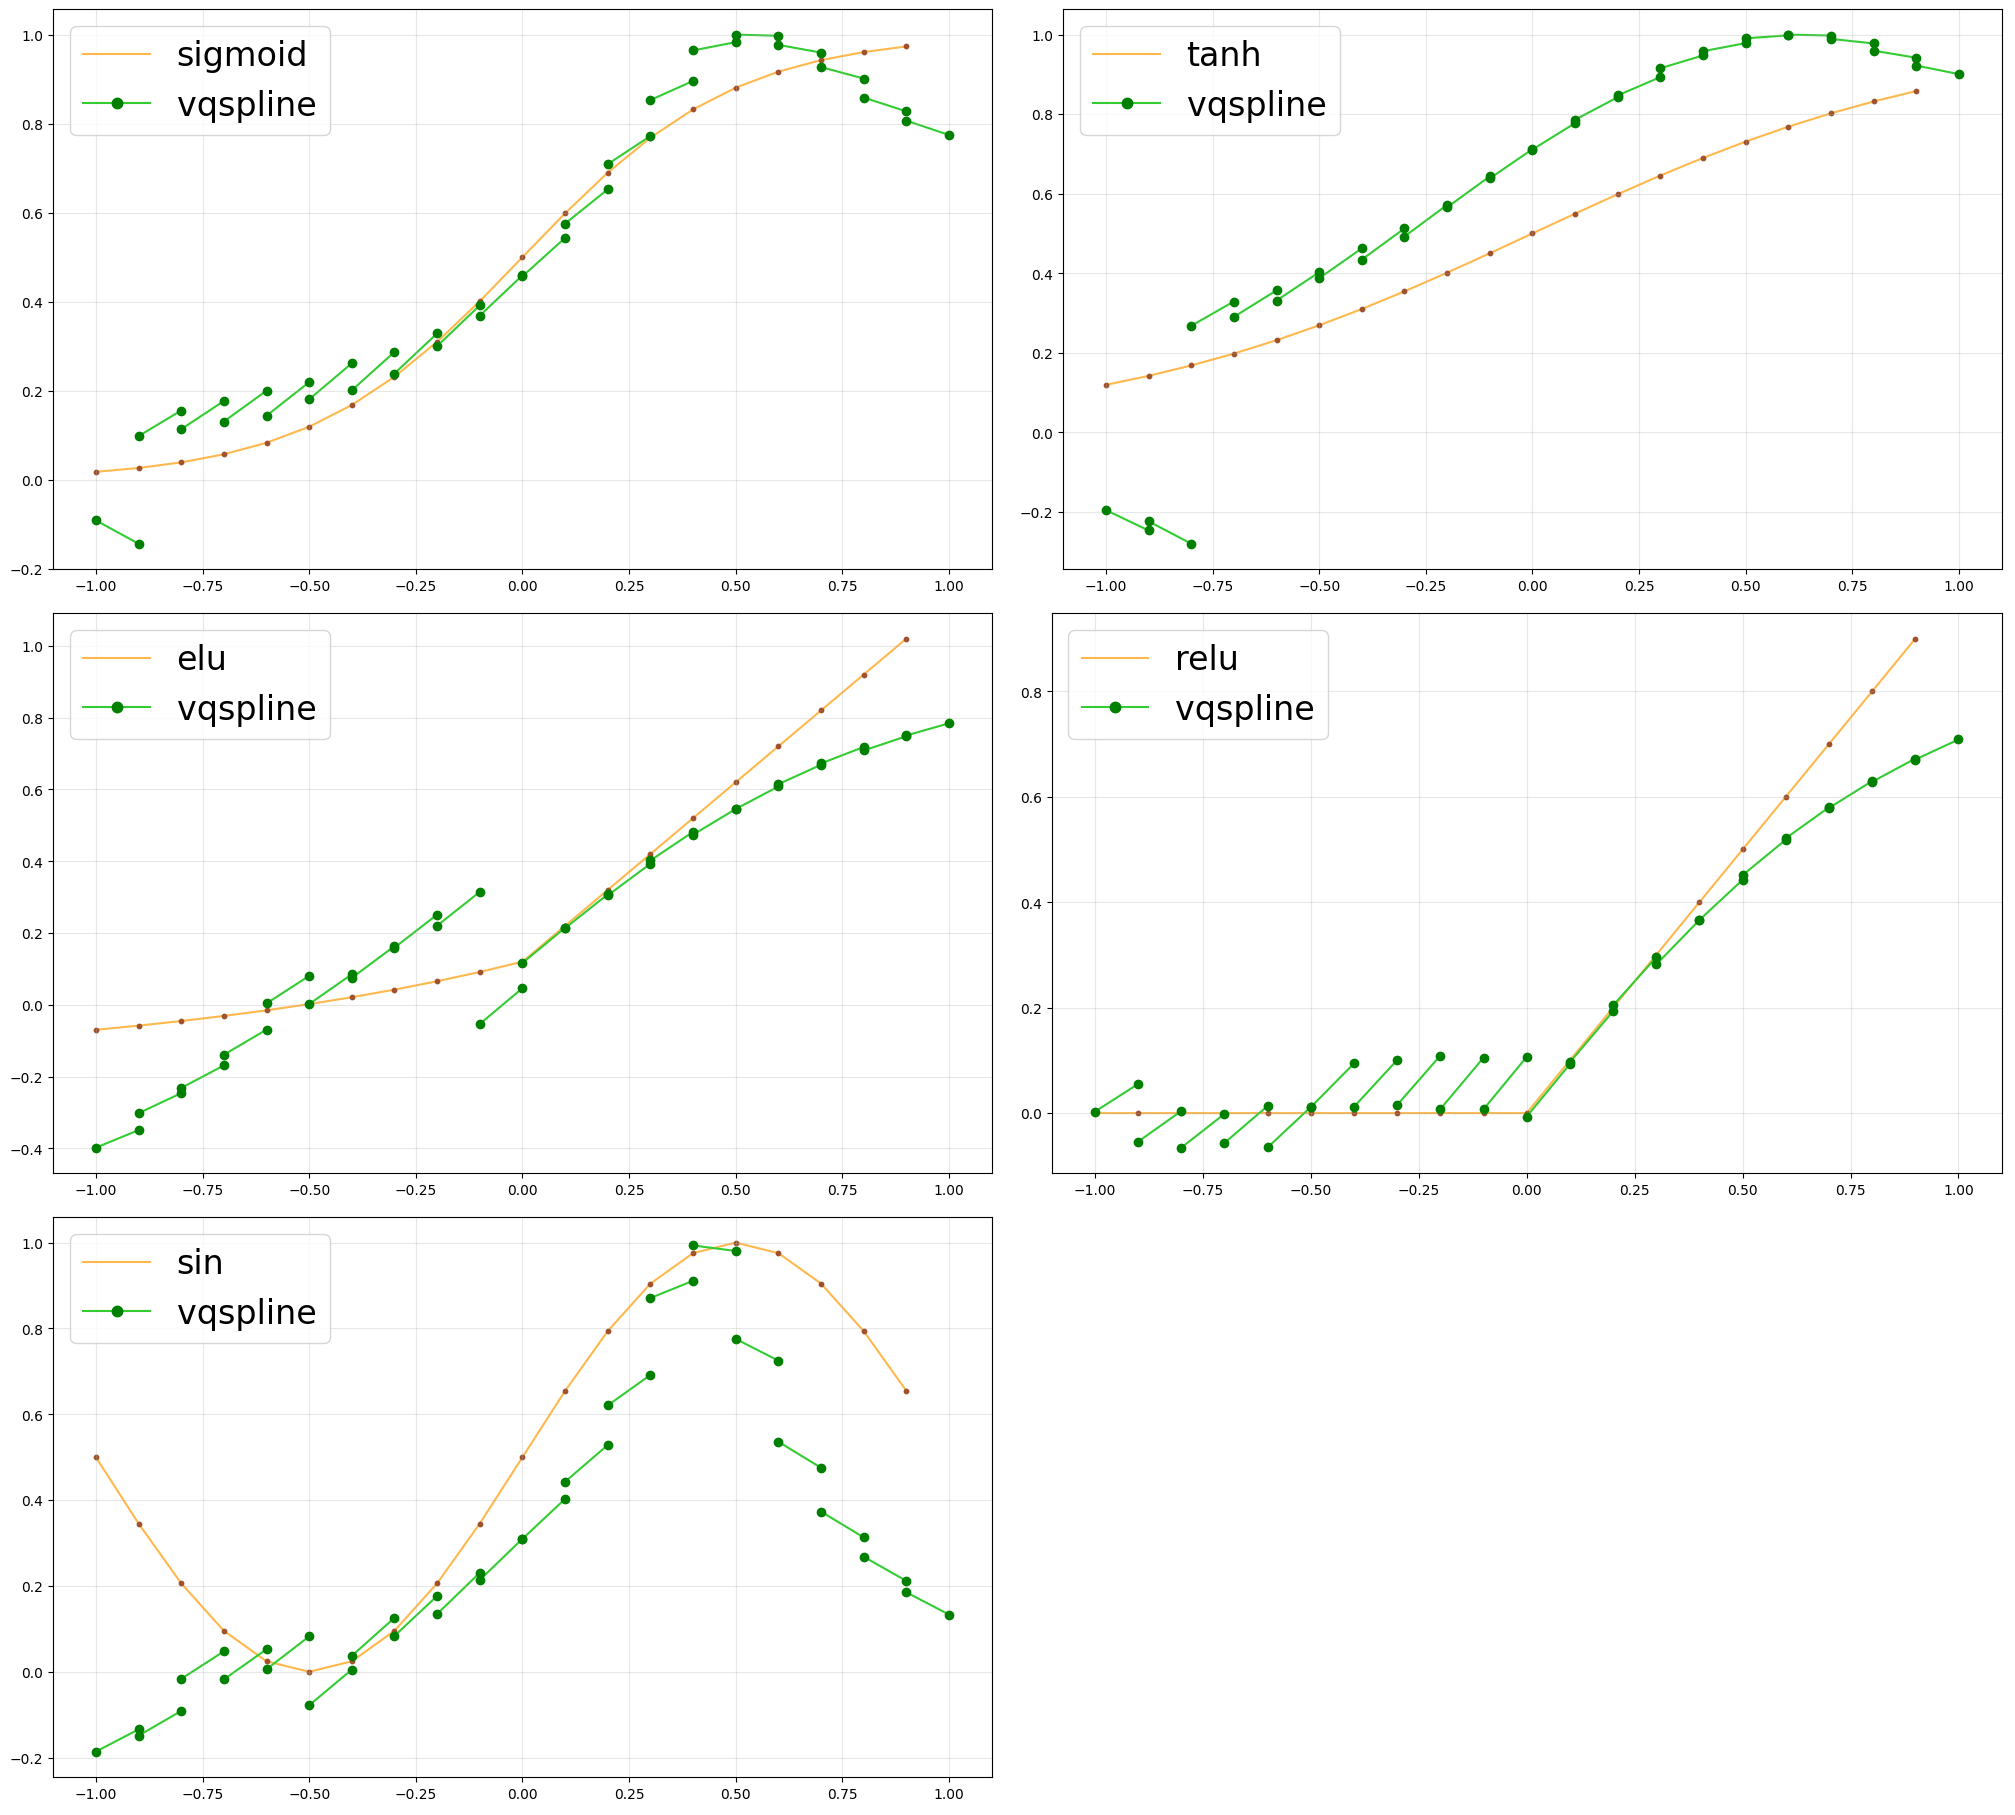

In [12]:

fig = plt.figure(constrained_layout=True, figsize=(20,18))
axE = fig.subfigures(3,2,  )
j = 0
k = 0
rss=[]
for flab, fun in func_out.items():
    #axE[k][j].suptitle(f'{flab}',fontsize=30)

    ax = axE[k][j].subplots(nrows=1, ncols=1, sharey=True,)
    #ax.set_ylim(-0.1,1)
    j-=-1
    if j>=2:
        k-=-1
        j=j%2
    dl = df[df['function'] == flab].iloc[0]
    X = []
    f_i = func_dict[flab]

    x = np.arange(-1, 1 + .03, step).tolist()
    y = [fun(value,f_i) for value in x]

    for i in range(1, len(x)):
        X.append(np.arange(x[i - 1], x[i], step - 0.000001).tolist())


    qc_full = []
    classic_prod = []
    qprod = qProduct(1)
    for i in range(len(X)):
        for x in X[i]:
            point = [1,x]
            qc_full.append(qprod.direct_prod2(dl.weights[i],point,visualize=False))  

    x = [item for sublist in X for item in sublist]
    y = [fun(value,f_i) for value in x]




    x1=[i for j,i in enumerate(x) if j%2==0]
    y1=[i for j,i in enumerate(y) if j%2==0]
    x2 = np.array([i for i in x]).reshape([20,2])
    yeee = np.array([i.item() for i in qc_full]).reshape([20,2])


    #ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
    #ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
    for xk, yk in zip(x2, yeee):
        ax.plot(xk, yk, zorder = 1,color='#33cc33') 
        ax.scatter(xk, yk, zorder=2,color='#008000') 

    ax.plot(x1,y1,color='#ffb84d', zorder = -1, label=f'{flab}')
    ax.scatter(x1,y1,color='sienna',zorder=0,s=10)
    ax.grid(alpha=0.3)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(mlines.Line2D([], [], color='#33cc33', marker='.',
                          markersize=15, label='vqspline', markerfacecolor='#008000', markeredgecolor='#008000'))
    plt.legend(handles = handles, loc='best', fontsize=24)

plt.show()
plt.close()


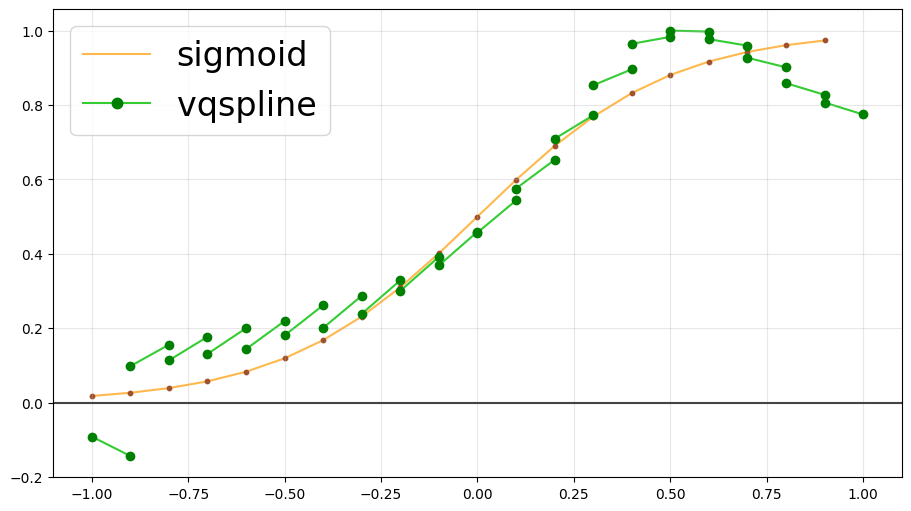

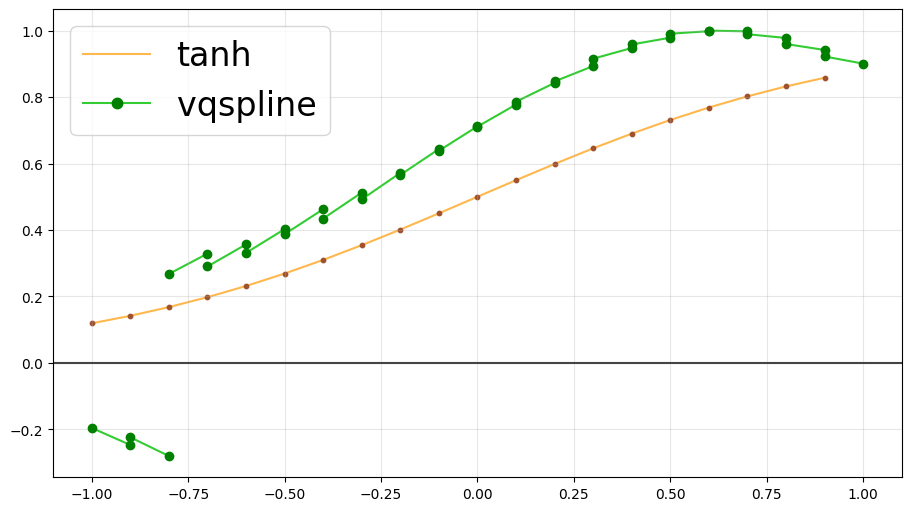

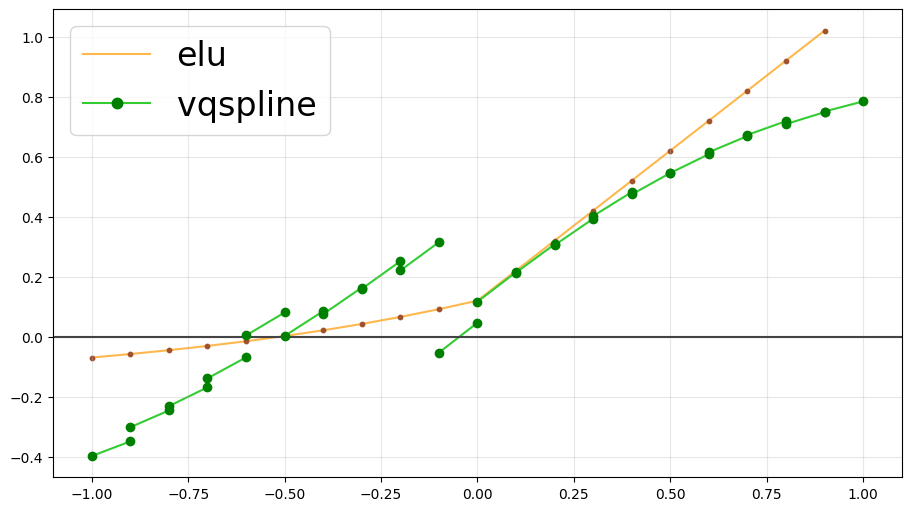

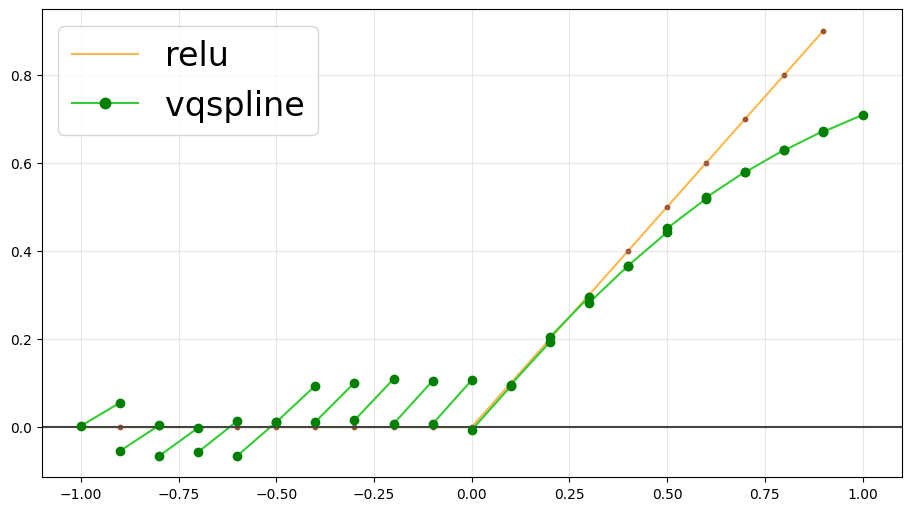

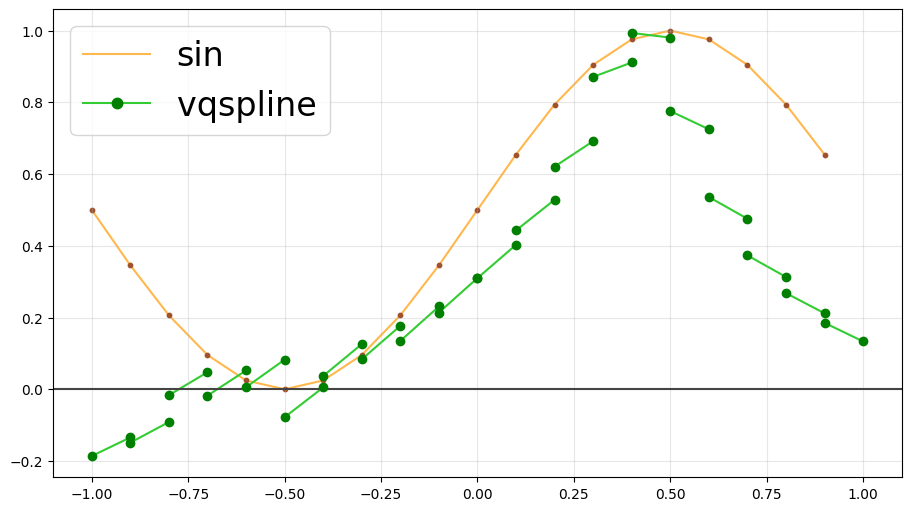

In [23]:

j = 0
k = 0
rss=[]
for flab, fun in func_out.items():
    #axE[k][j].suptitle(f'{flab}',fontsize=30)
    fig = plt.figure(constrained_layout=True, figsize=(9,5))
    axE = fig.subfigures(1,1,  )

    ax = axE.subplots(nrows=1, ncols=1, sharey=True,)
    #ax.set_ylim(-0.1,1)
    j-=-1
    if j>=2:
        k-=-1
        j=j%2
    dl = df[df['function'] == flab].iloc[0]
    X = []
    f_i = func_dict[flab]

    x = np.arange(-1, 1 + .03, step).tolist()
    y = [fun(value,f_i) for value in x]

    for i in range(1, len(x)):
        X.append(np.arange(x[i - 1], x[i], step - 0.000001).tolist())


    qc_full = []
    classic_prod = []
    qprod = qProduct(1)
    for i in range(len(X)):
        for x in X[i]:
            point = [1,x]
            qc_full.append(qprod.direct_prod2(dl.weights[i],point,visualize=False))  

    x = [item for sublist in X for item in sublist]
    y = [fun(value,f_i) for value in x]




    x1=[i for j,i in enumerate(x) if j%2==0]
    y1=[i for j,i in enumerate(y) if j%2==0]
    x2 = np.array([i for i in x]).reshape([20,2])
    yeee = np.array([i.item() for i in qc_full]).reshape([20,2])

    ax.axhline(0, color="#444444")

    #ax.plot(x, qc_full, color='steelblue',label=' Qspline') 
    #ax.scatter(x, qc_full, color='steelblue',label=' Qspline') 
    for xk, yk in zip(x2, yeee):
        ax.plot(xk, yk, zorder = 1,color='#33cc33') 
        ax.scatter(xk, yk, zorder=2,color='#008000') 

    ax.plot(x1,y1,color='#ffb84d', zorder = -1, label=f'{flab}')
    ax.scatter(x1,y1,color='sienna',zorder=0,s=10)
    ax.grid(alpha=0.3)
    handles, labels = ax.get_legend_handles_labels()
    handles.append(mlines.Line2D([], [], color='#33cc33', marker='.',
                          markersize=15, label='vqspline', markerfacecolor='#008000', markeredgecolor='#008000'))
    plt.legend(handles = handles, loc='best', fontsize=24)

    plt.savefig(f'plots/n_vqs_{flab}_plot')
    plt.show()
plt.close()
